## importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Read the dataset ( covid - 19)

In [3]:
data = pd.read_csv("Covid-19.csv")
data

,DATE,TOTAL_CASES,NEW_CASES,TOTAL_CONFIRMED,NEW_CONFIRMED,TOTAL_PROBABLE,NEW_PROBABLE,POS_TESTS,NEG_TESTS,TOTAL_TESTS,NEW_TESTS,NEW_DEATHS,TOTAL_DEATHS,NEW_ACTIVE,TOTAL_ACTIVE,NEW_HOSP,TOTAL_HOSP
0,04-03-2020,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05-03-2020,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-03-2020,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07-03-2020,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-03-2020,3,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,18-09-2020,180497,2357.0,174637.0,2184.0,5860.0,173.0,212799.0,2384683.0,2597482.0,38290.0,32.0,2196.0,851.0,15120.0,84.0,8063.0
198,19-09-2020,181439,942.0,175443.0,806.0,5996.0,136.0,213848.0,2407243.0,2621091.0,23609.0,20.0,2216.0,-879.0,14241.0,53.0,8116.0
199,20-09-2020,183514,2075.0,177394.0,1951.0,6120.0,124.0,216225.0,2444781.0,2661006.0,39915.0,2.0,2218.0,1211.0,15452.0,43.0,8159.0
200,21-09-2020,184409,895.0,178190.0,796.0,6219.0,99.0,217209.0,2455978.0,2673187.0,12181.0,15.0,2233.0,50.0,15502.0,40.0,8199.0


## Cleaning the data

In [4]:
data.isnull().values.any()

True

In [5]:
data = data.dropna()
data

,DATE,TOTAL_CASES,NEW_CASES,TOTAL_CONFIRMED,NEW_CONFIRMED,TOTAL_PROBABLE,NEW_PROBABLE,POS_TESTS,NEG_TESTS,TOTAL_TESTS,NEW_TESTS,NEW_DEATHS,TOTAL_DEATHS,NEW_ACTIVE,TOTAL_ACTIVE,NEW_HOSP,TOTAL_HOSP
62,05-05-2020,13624,122.0,13624.0,122.0,66.0,-3.0,13624.0,205172.0,218796.0,7353.0,7.0,226.0,-163.0,7108.0,13.0,1156.0
63,06-05-2020,13938,314.0,13938.0,314.0,68.0,2.0,13938.0,213163.0,227101.0,8305.0,13.0,239.0,27.0,7135.0,67.0,1223.0
64,07-05-2020,14096,158.0,14096.0,158.0,70.0,2.0,14096.0,222232.0,236328.0,9227.0,-2.0,237.0,-59.0,7076.0,43.0,1266.0
65,08-05-2020,14441,345.0,14441.0,345.0,71.0,1.0,14441.0,229137.0,243578.0,7250.0,4.0,241.0,113.0,7189.0,33.0,1299.0
66,09-05-2020,14768,327.0,14768.0,327.0,75.0,4.0,14768.0,237980.0,252748.0,9170.0,1.0,242.0,-32.0,7157.0,20.0,1319.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,18-09-2020,180497,2357.0,174637.0,2184.0,5860.0,173.0,212799.0,2384683.0,2597482.0,38290.0,32.0,2196.0,851.0,15120.0,84.0,8063.0
198,19-09-2020,181439,942.0,175443.0,806.0,5996.0,136.0,213848.0,2407243.0,2621091.0,23609.0,20.0,2216.0,-879.0,14241.0,53.0,8116.0
199,20-09-2020,183514,2075.0,177394.0,1951.0,6120.0,124.0,216225.0,2444781.0,2661006.0,39915.0,2.0,2218.0,1211.0,15452.0,43.0,8159.0
200,21-09-2020,184409,895.0,178190.0,796.0,6219.0,99.0,217209.0,2455978.0,2673187.0,12181.0,15.0,2233.0,50.0,15502.0,40.0,8199.0


## Determine the features(input) and output

In [6]:
x = np.array(data['TOTAL_TESTS']).reshape(-1,1)
y = np.array(data['POS_TESTS']).reshape(-1,1)

In [7]:
x

array([[ 218796.],
       [ 227101.],
       [ 236328.],
       [ 243578.],
       [ 252748.],
       [ 261869.],
       [ 273277.],
       [ 283924.],
       [ 292917.],
       [ 302317.],
       [ 309756.],
       [ 320201.],
       [ 325280.],
       [ 337428.],
       [ 346123.],
       [ 354013.],
       [ 360583.],
       [ 368170.],
       [ 373758.],
       [ 383576.],
       [ 396219.],
       [ 403504.],
       [ 409630.],
       [ 415989.],
       [ 421967.],
       [ 427046.],
       [ 435977.],
       [ 448493.],
       [ 462136.],
       [ 470779.],
       [ 476138.],
       [ 482172.],
       [ 491421.],
       [ 498768.],
       [ 512763.],
       [ 521197.],
       [ 528635.],
       [ 535096.],
       [ 594960.],
       [ 601161.],
       [ 615043.],
       [ 629769.],
       [ 638772.],
       [ 644344.],
       [ 652160.],
       [ 668588.],
       [ 675101.],
       [ 685381.],
       [ 699854.],
       [ 705164.],
       [ 718038.],
       [ 727268.],
       [ 741

## Spliting the data

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [9]:
x_train.size

105

In [10]:
y_train.size

105

## Creating the model

In [11]:
model = LinearRegression()

In [12]:
model = model.fit(x_train, y_train)
model

LinearRegression()

## Evaluate the model

In [20]:
## show accurate my model is 

score = model.score(x_test, y_test)*100
score.round(2)

99.55

## predict the data

In [23]:
y_predict = model.predict(x_test)

In [27]:
pre =pd.Series(y_predict.ravel())
y_test = pd.Series(y_test.ravel())
concate = [pre, y_test]
z = pd.concat(concate, axis=1, keys=['predict', 'actual'])
z.head()

,predict,actual
0,44582.168025,39687.0
1,63443.901907,58202.0
2,9973.501814,16110.0
3,49031.241877,43217.0
4,131409.195669,137277.0


<function matplotlib.pyplot.show(*args, **kw)>

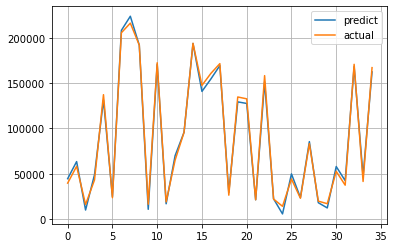

In [29]:
z.plot()
plt.grid()
plt.show

## Visualising the input and output

Text(0, 0.5, 'POSITIVE CASES')

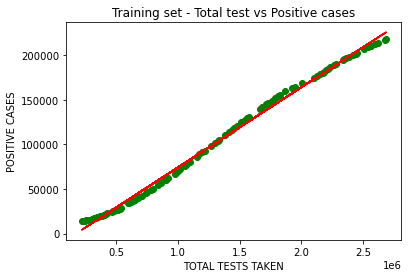

In [31]:
plt.scatter(x_train, y_train, color = 'green')
plt.plot(x_train, model.predict(x_train), color = 'red')
plt.title('Training set - Total test vs Positive cases')
plt.xlabel("TOTAL TESTS TAKEN")
plt.ylabel("POSITIVE CASES")

Text(0, 0.5, 'POSITIVE CASES')

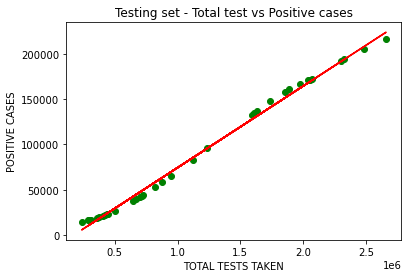

In [32]:
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test, model.predict(x_test), color = 'red')
plt.title('Testing set - Total test vs Positive cases')
plt.xlabel("TOTAL TESTS TAKEN")
plt.ylabel("POSITIVE CASES")